
# Solution Steps:

- Understanding the dataset
- EDA
- Cleaning the data (Handling missing values and all the stuff)
- Splitting the data
- Modelling the data
- Checking the better accuracy
- Finally applying it on test data set that has highest accuracy

In [1]:
# For data analysis
import numpy as np
import pandas as pd


In [2]:
# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\majain\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# To ignore any warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
# Reading the data set
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


## 1. Understanding the data set

In [5]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#train.shape, test.shape

In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
# Numeric cols listing
numeric_cols = train.select_dtypes(include=[np.number])
numeric_cols.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

In [10]:
# chategorical cols listing
char_cols = train.select_dtypes(include=[np.object])
char_cols.dtypes

Loan_ID          object
Gender           object
Married          object
Dependents       object
Education        object
Self_Employed    object
Property_Area    object
Loan_Status      object
dtype: object

## 2. EDA

In [11]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

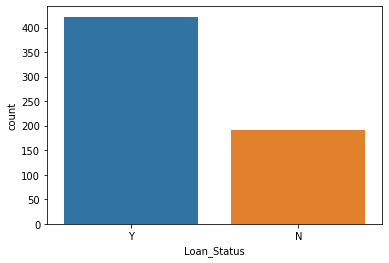

In [12]:
sns.countplot(train.Loan_Status)

In [13]:
train.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

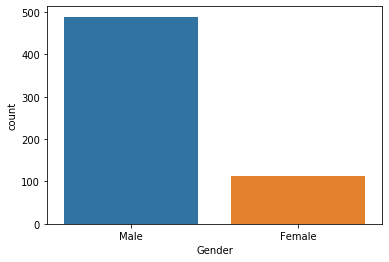

In [14]:
sns.countplot(train.Gender)

In [15]:
train.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

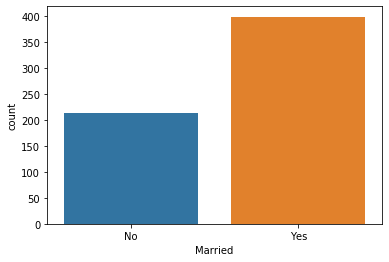

In [16]:
sns.countplot(train.Married)

In [17]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

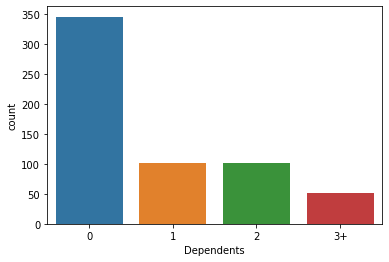

In [18]:
sns.countplot(train.Dependents)

In [19]:
train.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

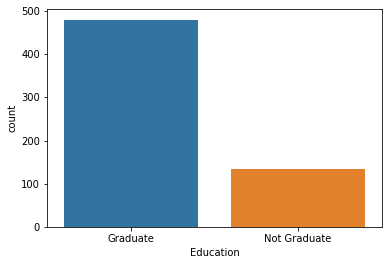

In [20]:
sns.countplot(train.Education)

In [21]:
train.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

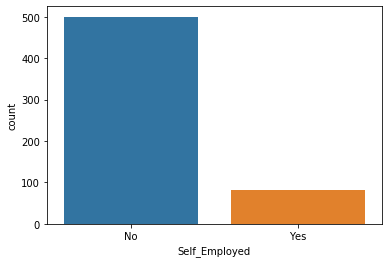

In [22]:
sns.countplot(train.Self_Employed)

In [23]:
train.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

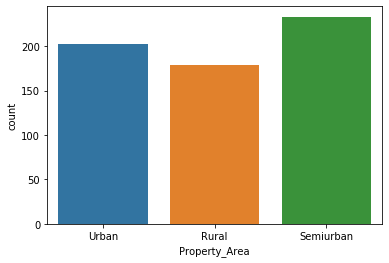

In [24]:
sns.countplot(train.Property_Area)

In [25]:
train.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

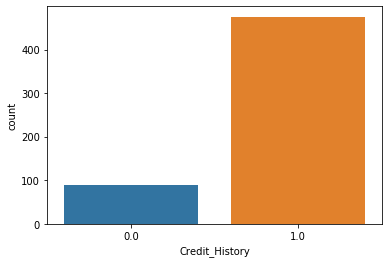

In [26]:
sns.countplot(train.Credit_History)

- We can see that approximately 81% are Male and 19% are female.
- Percentage of applicants with no dependents is higher.
- There are more number of graduates than non graduates.
- Semi Urban people is slightly higher than Urban people among the applicants.
- Larger Percentage of people have a good credit history.
- The percentage of people that the loan has been approved has been higher rather than the percentage of applicant for which the loan has been declined.


<Figure size 576x576 with 0 Axes>

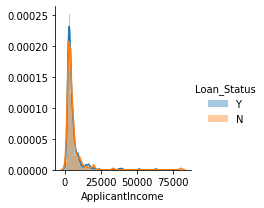

In [27]:
plt.figure(figsize=(8,8))
sns.FacetGrid(train, hue='Loan_Status').map(sns.distplot, 'ApplicantIncome').add_legend()

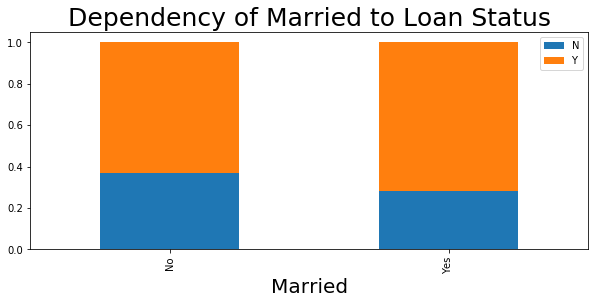

In [28]:
data = pd.crosstab(train.Married, train.Loan_Status)
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True, figsize=(10,4))
plt.title('Dependency of Married to Loan Status', fontsize=25)
plt.xlabel('Married', fontsize=20)
plt.legend()
plt.show()

We can infer that percentage of married people who have got their loan approved is higher when compared to non- married people.


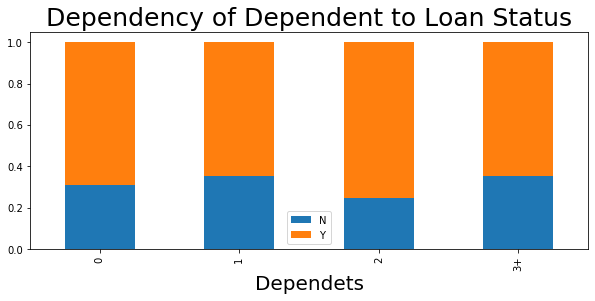

In [29]:
data = pd.crosstab(train.Dependents, train.Loan_Status)
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True, figsize=(10,4))
plt.title('Dependency of Dependent to Loan Status', fontsize=25)
plt.xlabel('Dependets', fontsize=20)
plt.legend()
plt.show()

The percentage of applicants with either 0 or 2 dependents have got their loan approved is higher.


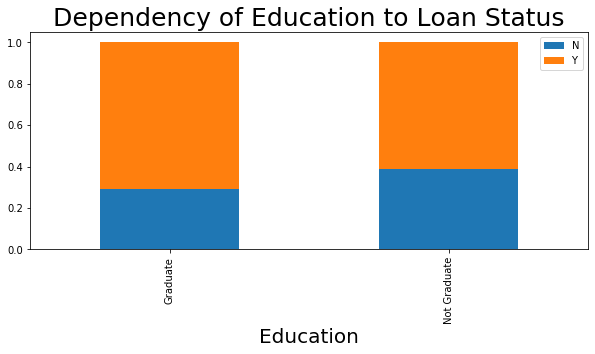

In [30]:
data = pd.crosstab(train.Education, train.Loan_Status)
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True, figsize=(10,4))
plt.title('Dependency of Education to Loan Status', fontsize=25)
plt.xlabel('Education', fontsize=20)
plt.legend()
plt.show()

The percentage of applicants who are graduates have got their loan approved rather than the one who are not graduates.


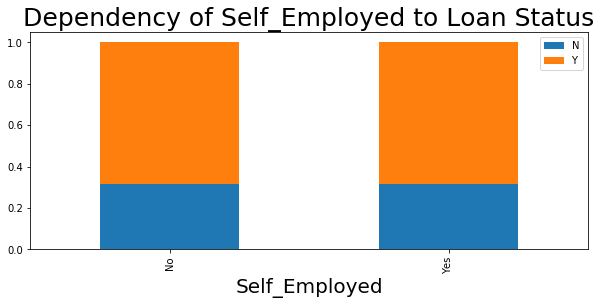

In [31]:
data = pd.crosstab(train.Self_Employed, train.Loan_Status)
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True, figsize=(10,4))
plt.title('Dependency of Self_Employed to Loan Status', fontsize=25)
plt.xlabel('Self_Employed', fontsize=20)
plt.legend()
plt.show()

There is hardly any correlation between Loan_Status and Self_Employed applicants. So in short we can say that it doesn’t matter whether the applicant is self employed or not.


#### Despite seeing some data analysis, unfortunately we could not figure out what factors exactly would distinguish the Loan Status column. Hence we go to next step which is nothing but Data Cleaning.


### 3.Cleaning the data and Structuring(Handling missing values and all the stuff)

- Before we go for modeling the data, we have to check whether the data is cleaned or not. And after cleaning part, we have to structure the Data. For cleaning part, First I have to check whether there exists any missing values. For that I am using the code snippet isnull()



In [32]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## We have observed that there are many null values. Now we will replace the 
- categorical missing values to the most occuring values
- Numeric missing values to by median

In [33]:
train1=train.copy()

train1['Gender'].fillna(train1['Gender'].mode()[0], inplace=True)
train1['Married'].fillna(train1['Married'].mode()[0], inplace=True)
train1['Dependents'].fillna(train1['Dependents'].mode()[0], inplace=True)
train1['Self_Employed'].fillna(train1['Self_Employed'].mode()[0], inplace=True)
train1['Credit_History'].fillna(train1['Credit_History'].mode()[0], inplace=True)

train1.isnull().sum()


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
train1.LoanAmount.median()

128.0

In [35]:
# Replacing missing values with the median value
train1['LoanAmount'].fillna(train1['LoanAmount'].median(), inplace=True)

In [36]:
train1.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
train1.Loan_Amount_Term.median()

360.0

In [38]:
train1.Loan_Amount_Term.mode()

0    360.0
dtype: float64

As observed there is no difference bwtween the mode and median of the 'Loan_Amount_term'. hence we chose to fill 360 for the replacing missing values

In [39]:
train1['Loan_Amount_Term'].fillna(360, inplace=True)

In [40]:
train1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [41]:
# Same cleaning steps needs to perform on test dataset

test2=test.copy()



In [42]:
test2.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [43]:
test2['Gender'].fillna(test2['Gender'].mode()[0], inplace=True)


In [44]:
test2['Dependents'].fillna(test2['Dependents'].mode()[0], inplace=True)
test2['Self_Employed'].fillna(test2['Self_Employed'].mode()[0], inplace=True)
test2['Credit_History'].fillna(test2['Credit_History'].mode()[0], inplace=True)
test2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

In [45]:
test2['Loan_Amount_Term'].fillna(test2['Loan_Amount_Term'].mode()[0], inplace=True)
test2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [46]:
test2['LoanAmount'].median()

125.0

In [47]:
test2['LoanAmount'].fillna(125, inplace=True)

In [48]:
test2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [49]:
# making a copy of test and train dataset

train3= train1.copy()
test3=test2.copy()

In [50]:

test3 = test3.drop(['Loan_ID'], axis=1)
train3 = train3.drop(['Loan_ID'], axis=1)


In [51]:
test3.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [52]:
train3.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [53]:
# Creating independent and dependent variables

X = train3.drop(['Loan_Status'],1)
Y = train3.Loan_Status

In [54]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [55]:
Y.head(3)

0    Y
1    N
2    Y
Name: Loan_Status, dtype: object

In [56]:
X.shape, Y.shape

((614, 11), (614,))

As we are having a lot of categorical variables that are affecting Loan Status. We need to convert each of them in to numeric data for modelling.


In [57]:
X = pd.get_dummies(X)
train3=pd.get_dummies(train3)
test3 = pd.get_dummies(test3)

In [58]:
X.shape

(614, 20)

## 5. Modelling

In [59]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [60]:
test3.shape

(367, 20)

In [62]:
score1=0
i=1
kf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index,test_index in kf.split(X, Y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = Y.loc[train_index], Y[test_index]
    param_grid = {'C':[1.0,10.0,100.0]}
    model = GridSearchCV(LogisticRegression(random_state=1),param_grid, scoring='accuracy')
    model.fit(xtr, ytr)
    prediction = model.predict(xvl)          #making prediction of dataset
    score = accuracy_score(yvl, prediction)  # matching expected and actual output parameter
    score1= score + score1
    print('accuracy_score', score)
    i+=1
pred_test_sk1= model.predict(test3)
pred_sk1=model.predict_proba(xvl)[:, 1]
print('\n Avg accuracy is {}'.format(score))


1 of kfold 10
accuracy_score 0.7580645161290323

2 of kfold 10
accuracy_score 0.8548387096774194

3 of kfold 10
accuracy_score 0.7903225806451613

4 of kfold 10
accuracy_score 0.8064516129032258

5 of kfold 10
accuracy_score 0.8360655737704918

6 of kfold 10
accuracy_score 0.7540983606557377

7 of kfold 10
accuracy_score 0.8032786885245902

8 of kfold 10
accuracy_score 0.8032786885245902

9 of kfold 10
accuracy_score 0.7868852459016393

10 of kfold 10
accuracy_score 0.8032786885245902

 Avg accuracy is 0.8032786885245902
